In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
df.sample(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
246096,Data Engineer,Azure Data Engineer,Mexico,via BeBee,Full-time,False,Mexico,2023-11-03 07:10:06,True,False,Mexico,None,NaN,NaN,MSNS HR Technologies,"['sql', 'scala', 'azure', 'databricks', 'spark']","{'cloud': ['azure', 'databricks'], 'libraries'..."
423389,Data Engineer,Data Engineer - Streaming data (f/m/div.),"Stuttgart, Germany",via XING,Full-time,False,Germany,2023-02-18 16:14:53,False,False,Germany,None,NaN,NaN,Bosch Group,"['python', 'scala', 'azure', 'spark', 'kafka',...","{'cloud': ['azure'], 'libraries': ['spark', 'k..."
431200,Data Scientist,Praktikum/Abschlussarbeit (m/w/d) - Data Science,"Künzelsau, Germany",via BeBee,Internship,False,Germany,2023-11-18 16:34:41,False,False,Germany,None,NaN,NaN,Würth Industrie Service,None,None


In [5]:
df.pivot_table(index='job_title_short', aggfunc='size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [9]:
df.groupby('job_title_short').size()
# df.groupby('job_title_short').agg({'salary_year_avg': 'mean', 'salary_hour_avg': 'mean'})

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [12]:
# df.pivot_table(values='salary_year_avg', index='job_title_short', aggfunc='median')
df.pivot_table(values='salary_year_avg', index='job_title_short', columns='job_country', aggfunc='median')

job_country,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bangladesh,Belarus,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Zambia,Zimbabwe
job_title_short,,,,,,,,,,,,,,,,,,,,,
Business Analyst,NaN,NaN,71100.00,NaN,70000.0,NaN,NaN,NaN,16500.0,NaN,...,NaN,72900.0,NaN,56700.0,90000.0,NaN,NaN,79200.0,NaN,NaN
Cloud Engineer,NaN,NaN,197500.00,NaN,110000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,89100.0,NaN,NaN,116100.0,NaN,NaN,NaN,NaN,NaN
Data Analyst,49950.00,44100.0,92771.75,100500.0,109500.0,80850.00,NaN,NaN,NaN,400000.0,...,69300.0,72900.0,98500.0,87750.0,90000.0,100500.0,NaN,75550.0,NaN,63000.0
Data Engineer,NaN,45000.0,96773.00,48750.0,106712.5,147500.00,NaN,211000.0,97444.0,NaN,...,NaN,89100.0,97528.0,110000.0,125000.0,NaN,NaN,96773.0,NaN,NaN
Data Scientist,69981.25,NaN,71000.00,NaN,139216.0,71249.75,NaN,NaN,NaN,NaN,...,84200.0,131846.5,166419.5,105300.0,130000.0,NaN,30750.0,70000.0,90670.0,69085.0
Machine Learning Engineer,NaN,NaN,101029.00,87021.0,101029.0,89100.00,NaN,228750.0,69000.0,NaN,...,NaN,89100.0,62850.0,149653.0,150000.0,50000.0,NaN,57600.0,NaN,NaN
Senior Data Analyst,NaN,NaN,NaN,NaN,50640.0,89100.00,NaN,NaN,NaN,NaN,...,NaN,NaN,105837.5,111175.0,110000.0,NaN,NaN,105837.5,NaN,NaN
Senior Data Engineer,NaN,NaN,147500.00,NaN,147500.0,147500.00,NaN,173500.0,NaN,NaN,...,NaN,96773.0,NaN,147500.0,150000.0,NaN,NaN,147500.0,NaN,NaN
Senior Data Scientist,157500.00,NaN,NaN,NaN,157500.0,80850.00,NaN,NaN,NaN,NaN,...,NaN,157500.0,72000.0,157500.0,155000.0,57500.0,NaN,79200.0,NaN,NaN


In [17]:
top_countries = df['job_country'].value_counts().head(10).index
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain', 'Singapore', 'Sudan', 'Netherlands', 'Italy'],
      dtype='object', name='job_country')

In [21]:
df_job_country_salar = df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median'
)

df_job_country_salar = df_job_country_salar.loc[top_countries]
df_job_country_salar

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.00,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.00,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.00,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.00,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0
Singapore,79200.0,50400.00,99500.0,98301.5,131560.0,101029.0,100500.0,147500.0,157500.0,64800.0
Sudan,82665.0,70415.25,87500.0,127500.0,130000.0,165659.0,111175.0,147500.0,155000.0,100000.0
Netherlands,89100.0,NaN,93852.0,97444.0,157500.0,122800.0,111175.0,147500.0,147500.0,89100.0


<Axes: xlabel='job_country'>

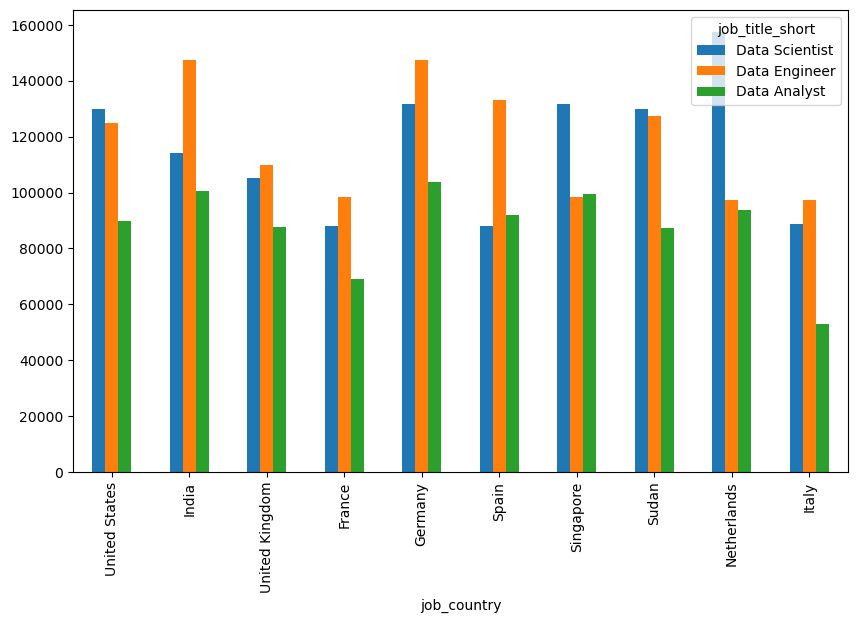

In [24]:
specific_jobs = ['Data Scientist', 'Data Engineer', 'Data Analyst']
df_job_country_salar = df_job_country_salar[specific_jobs]
df_job_country_salar.plot(kind='bar', figsize=(10, 6))